In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
pd.set_option('mode.chained_assignment',  None) # 경고를 끈다
pd.set_option('display.max_columns', None) # 모든 열 출력
plt.rcParams['axes.unicode_minus'] = False

In [2]:
taas = pd.read_csv('data/taas/taas_only.csv', encoding='cp949')

## taas 2019-2021

In [3]:
taas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61415 entries, 0 to 61414
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고번호        61415 non-null  int64  
 1   사고일시        61415 non-null  object 
 2   요일          61415 non-null  object 
 3   시군구         61415 non-null  object 
 4   사고내용        61415 non-null  object 
 5   사망자수        61415 non-null  int64  
 6   중상자수        61415 non-null  int64  
 7   경상자수        61415 non-null  int64  
 8   부상신고자수      61415 non-null  int64  
 9   사고유형        61415 non-null  object 
 10  법규위반        61415 non-null  object 
 11  노면상태        61415 non-null  object 
 12  기상상태        61415 non-null  object 
 13  도로형태        61415 non-null  object 
 14  가해운전자 차종    61415 non-null  object 
 15  가해운전자 성별    61415 non-null  object 
 16  가해운전자 연령    61415 non-null  object 
 17  가해운전자 상해정도  61415 non-null  object 
 18  피해운전자 차종    59488 non-null  object 
 19  피해운전자 성별    59487 non-nul

In [4]:
taas.head(1)

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,x,y
0,2019010100100002,2019년 1월 1일 00시,화요일,서울특별시 구로구 고척동,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,23세,상해없음,승용,남,71세,경상,126.867286,37.499889


In [5]:
# 1928건 숫자 유사 -> 동시에 null인 것으로 추정
taas.isnull().sum()

사고번호             0
사고일시             0
요일               0
시군구              0
사고내용             0
사망자수             0
중상자수             0
경상자수             0
부상신고자수           0
사고유형             0
법규위반             0
노면상태             0
기상상태             0
도로형태             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종      1927
피해운전자 성별      1928
피해운전자 연령      1927
피해운전자 상해정도    1928
x                0
y                0
dtype: int64

### 사고일시
+ 식사 시간대인 점심(11-14시)과 저녁(17-20시)에 사고가 많이 발생

In [6]:
taas['time'] = taas['사고일시'].astype(str).str[-3:]
time_list = taas['time'].unique().tolist()
time_list.sort(key=lambda x: int(x[:2]))

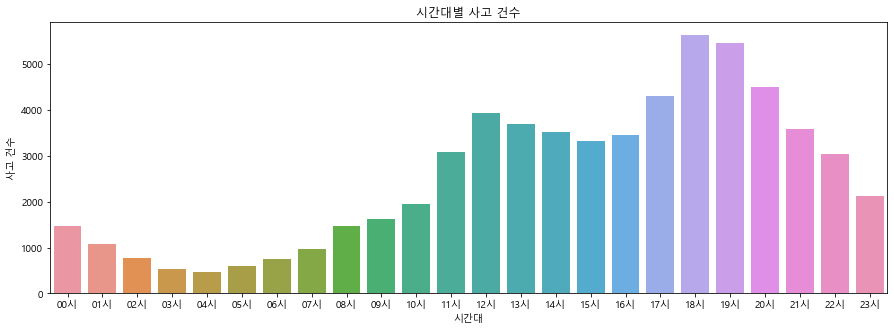

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x='time', data=taas, order=time_list)
plt.xlabel("시간대")
plt.ylabel("사고 건수")
plt.title("시간대별 사고 건수")
plt.show()

### 요일
+ 금요일, 토요일, 목요일 순서로 사고가 많이 발생

In [8]:
sns.set_palette('Set2')

In [9]:
day_order = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

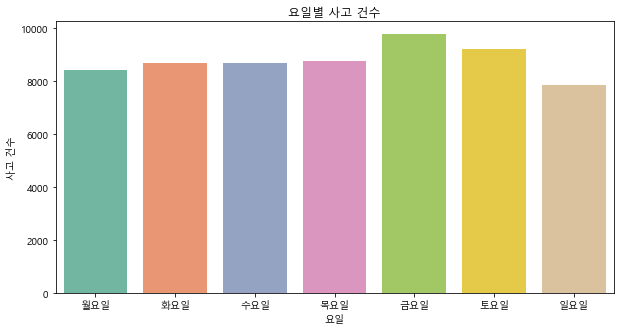

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='요일', data=taas, order=day_order)
plt.xlabel("요일")
plt.ylabel("사고 건수")
plt.title("요일별 사고 건수")
plt.show()

### 사고내용
+ 경상, 중상 사고가 압도적으로 많이 발생

In [11]:
taas['사고내용'].value_counts()

경상사고      35407
중상사고      20149
부상신고사고     5200
사망사고        659
Name: 사고내용, dtype: int64

In [12]:
sns.set_palette('Set2')

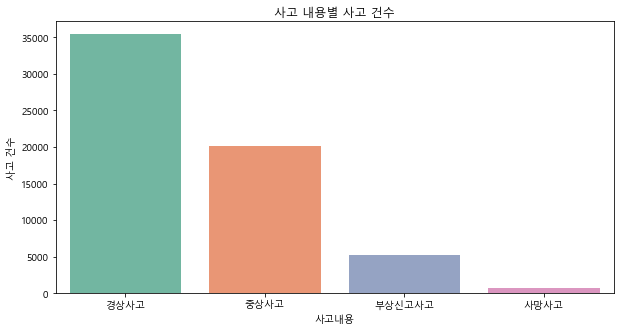

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='사고내용', data=taas, order=taas['사고내용'].value_counts().index)
plt.xlabel("사고내용")
plt.ylabel("사고 건수")
plt.title("사고 내용별 사고 건수")
plt.show()

### 사고유형
+ 차대차 - 측면충돌 유형의 사고가 많이 발생

In [14]:
taas['사고유형'].value_counts()

차대차 - 측면충돌           25933
차대차 - 기타             19248
차대차 - 추돌              6134
차대차 - 정면충돌            2502
차대사람 - 횡단중            2431
차대사람 - 기타             1444
차대차 - 후진중충돌            801
차량단독 - 기타              728
차량단독 - 전도전복 - 전도       679
차대사람 - 보도통행중           454
차량단독 - 공작물충돌           428
차대사람 - 차도통행중           420
차대사람 - 길가장자리구역통행중      119
차량단독 - 도로외이탈 - 추락       36
차량단독 - 도로외이탈 - 기타       27
차량단독 - 전도전복 - 전복        22
차량단독 - 주/정차차량 충돌         8
철길건널목 - 철길건널목            1
Name: 사고유형, dtype: int64

In [15]:
sns.set_palette('Set2')

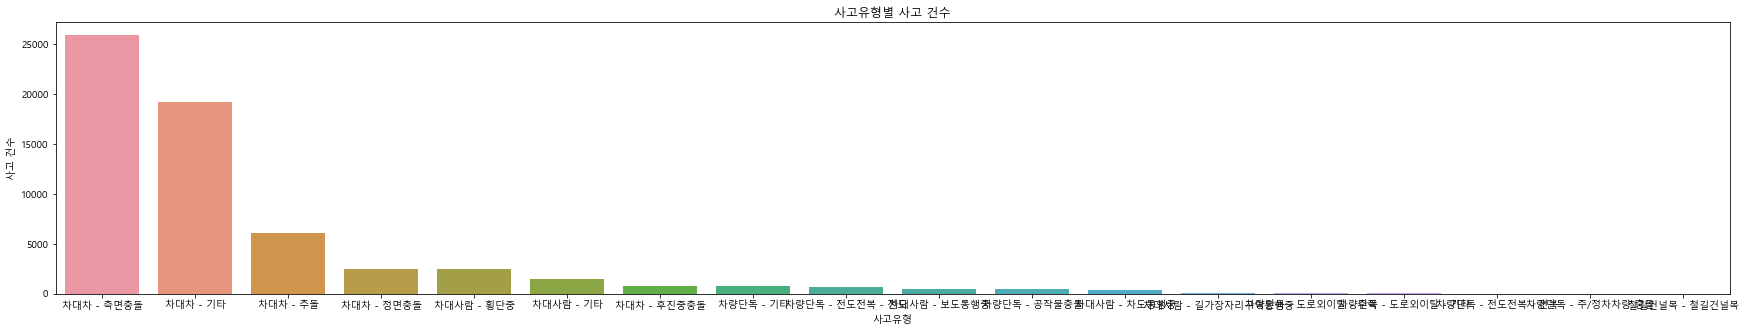

In [16]:
plt.figure(figsize=(30,5))
sns.countplot(x='사고유형', data=taas, order=taas['사고유형'].value_counts().index)
plt.xlabel("사고유형")
plt.ylabel("사고 건수")
plt.title("사고유형별 사고 건수")
plt.show()

In [17]:
sns.set_palette('Paired')

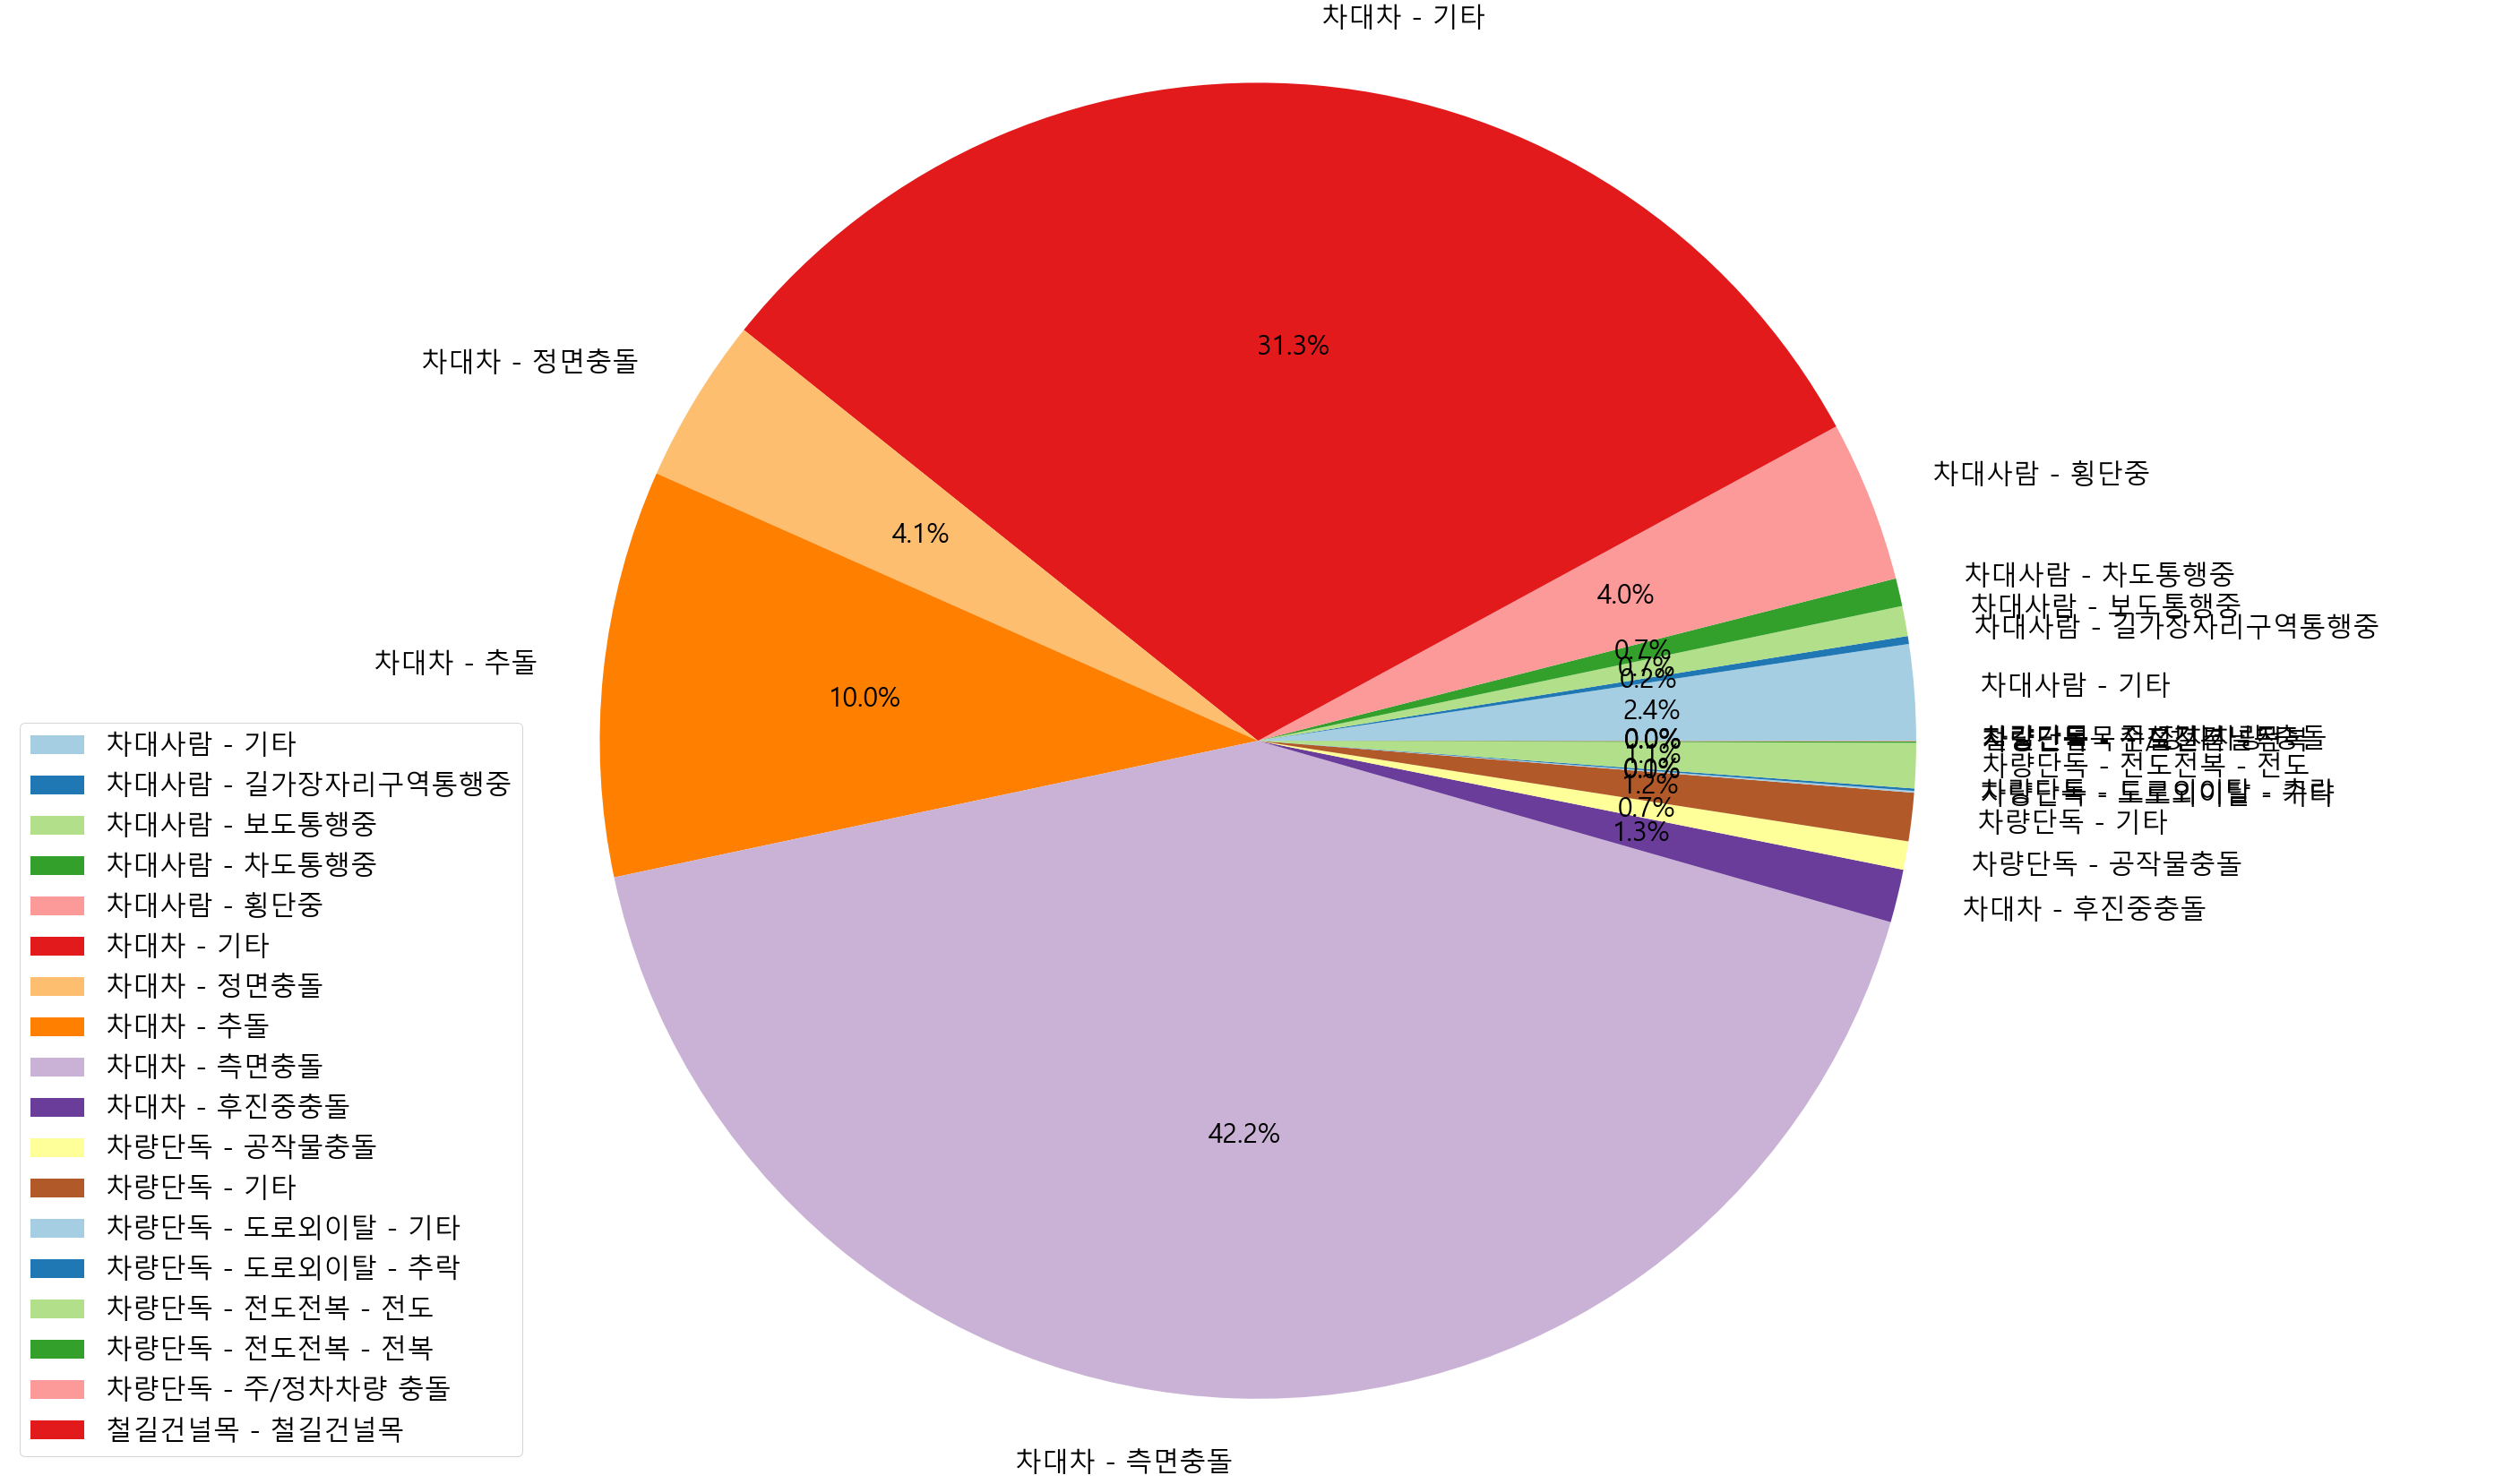

In [18]:
plt.figure(figsize=(50,30))
grouped_1 = taas.groupby('사고유형').size().reset_index(name='counts')
plt.rc('font', size=30)

# Plot the pie chart
plt.pie(grouped_1['counts'], labels=grouped_1['사고유형'], autopct='%1.1f%%')
plt.legend(grouped_1['사고유형'], loc='lower left')
plt.axis('equal')
plt.show()

### 법규위반 비교
+ 안전운전불이행, 신호위반, 안전거리미확보 순서로 사고가 많이 발생

In [19]:
taas['법규위반'].value_counts()

안전운전불이행      29395
신호위반         11240
안전거리미확보       6390
교차로운행방법위반     4287
중앙선침범         3053
기타            2389
직진우회전진행방해     2251
차로위반          1089
보행자보호의무위반      616
불법유턴           572
과속             133
Name: 법규위반, dtype: int64

In [20]:
sns.set_palette('Set2')
plt.rc('font', size=10)

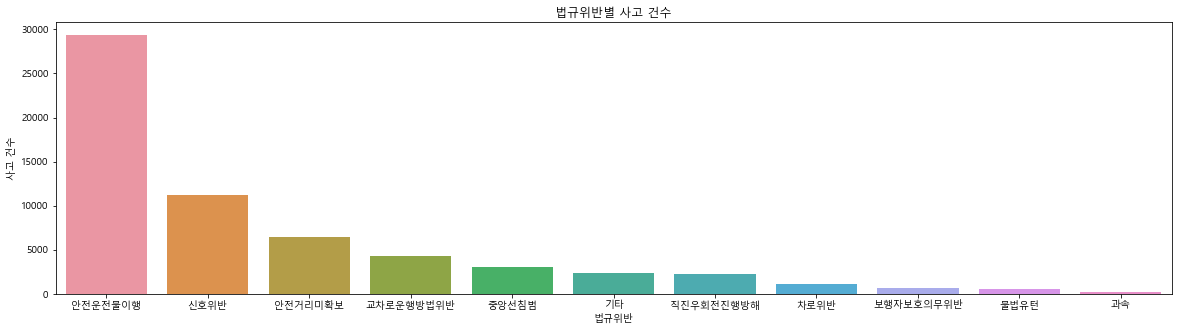

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(x='법규위반', data=taas, order=taas['법규위반'].value_counts().index)
plt.xlabel("법규위반")
plt.ylabel("사고 건수")
plt.title("법규위반별 사고 건수")
plt.show()

In [22]:
sns.set_palette('Paired')

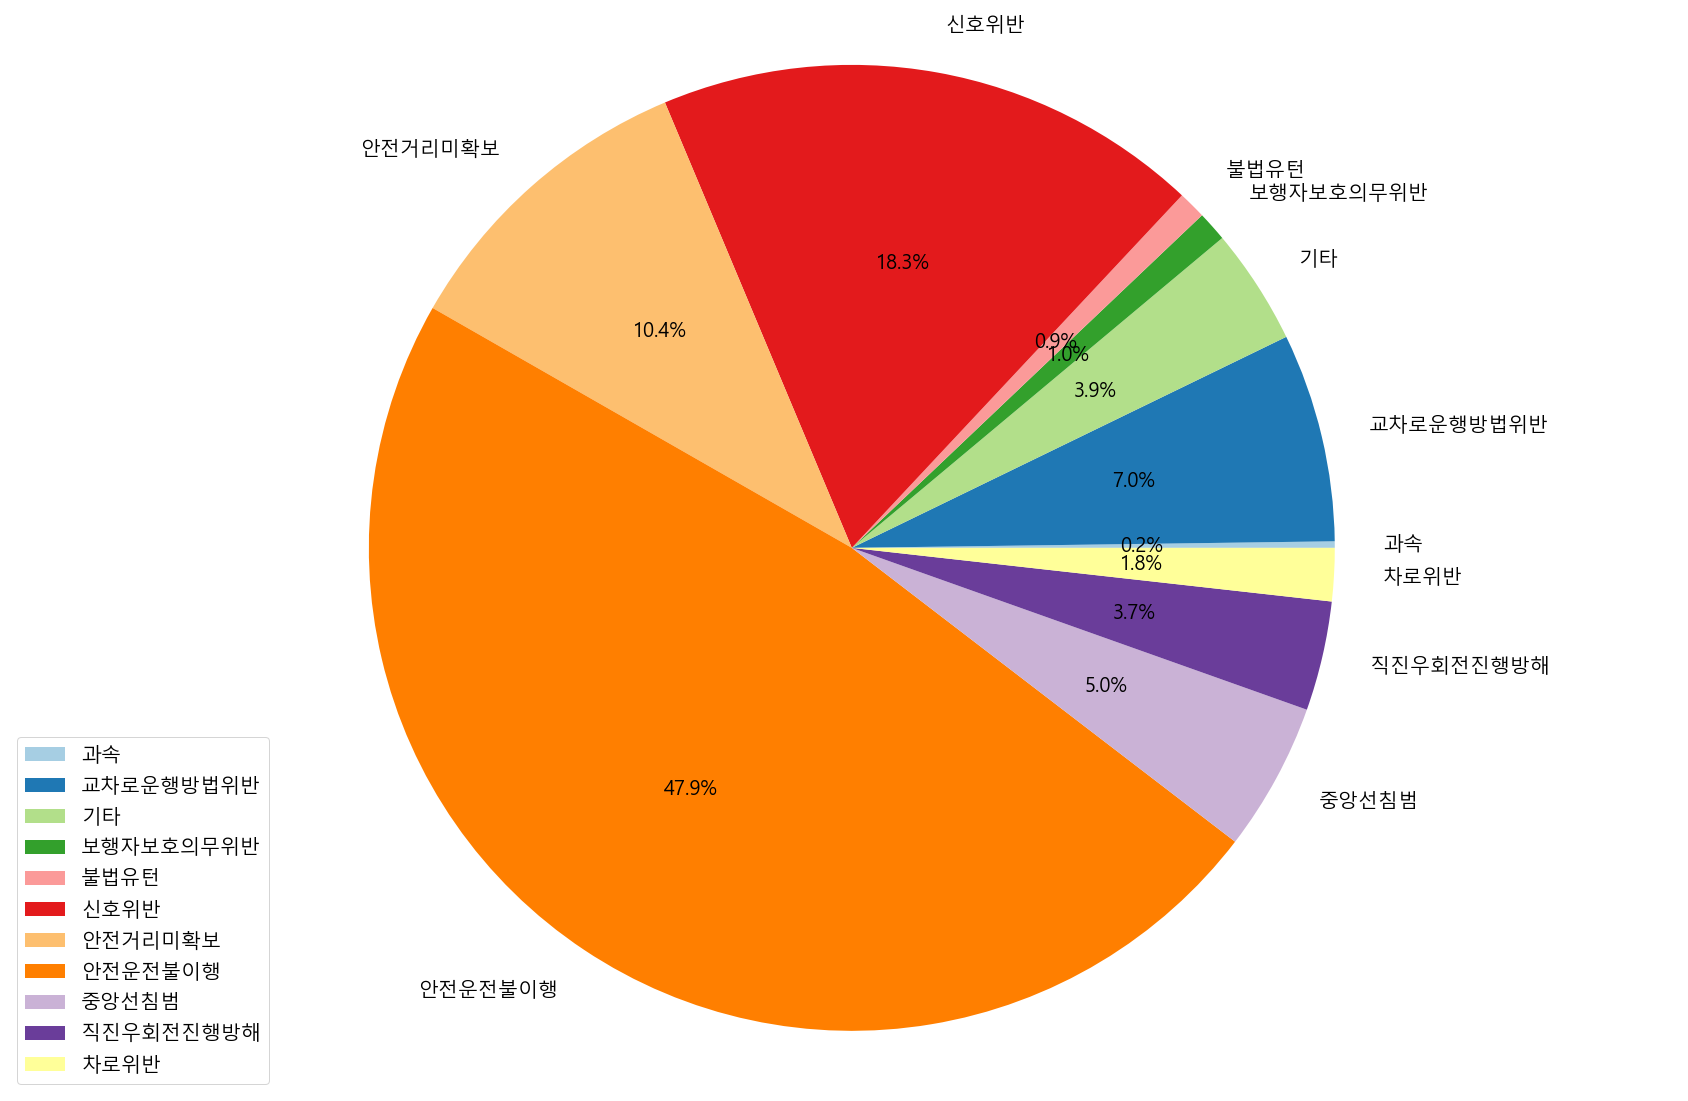

In [23]:
plt.figure(figsize=(30,20))
grouped_2 = taas.groupby('법규위반').size().reset_index(name='counts')
plt.rc('font', size=20)

# Plot the pie chart
plt.pie(grouped_2['counts'], labels=grouped_2['법규위반'], autopct='%1.1f%%')
plt.legend(grouped_2['법규위반'], loc='lower left')
plt.axis('equal')
plt.show()

### 노면상태
+ 날씨가 좋은 날이 많기에 그에 따른 결과로 추정

In [24]:
taas['노면상태'].value_counts()

포장 - 건조        54607
포장 - 젖음/습기      6002
포장 - 기타          591
포장 - 서리/결빙       110
비포장 - 젖음/습기       42
포장 - 적설           29
비포장 - 건조          19
포장 - 침수            7
비포장 - 기타           4
포장 - 해빙            3
비포장 - 적설           1
Name: 노면상태, dtype: int64

In [25]:
sns.set_palette('Set2')
plt.rc('font', size=10)

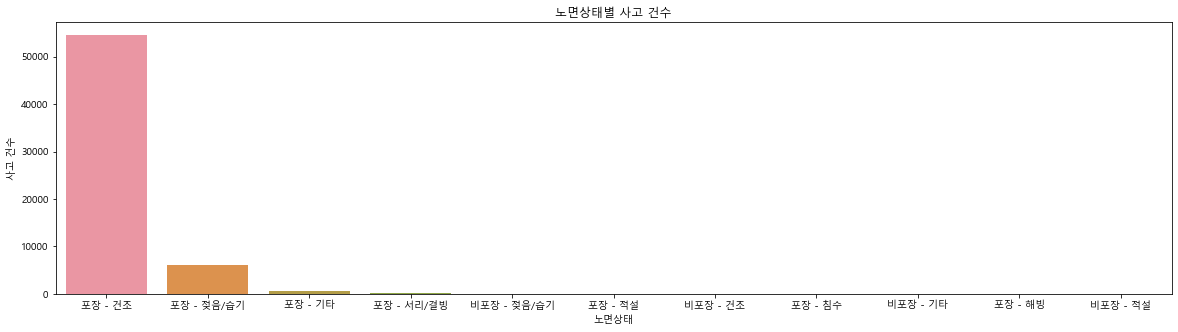

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(x='노면상태', data=taas, order=taas['노면상태'].value_counts().index)
plt.xlabel("노면상태")
plt.ylabel("사고 건수")
plt.title("노면상태별 사고 건수")
plt.show()

### 기상상태
+ 날씨가 좋은 날이 많기에 그에 따른 결과로 추정

In [27]:
taas['기상상태'].value_counts()

맑음    53908
비      4577
흐림     2271
기타      546
눈       103
안개       10
Name: 기상상태, dtype: int64

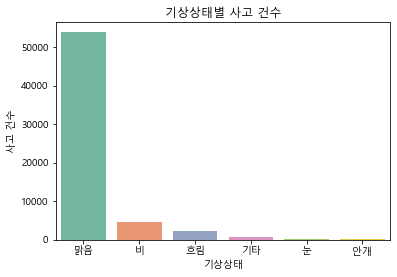

In [28]:
sns.countplot(x='기상상태', data=taas, order=taas['기상상태'].value_counts().index)
plt.xlabel("기상상태")
plt.ylabel("사고 건수")
plt.title("기상상태별 사고 건수")
plt.show()

### 도로형태
+ 단일로 - 기타, 교차로 - 교차로안 형태의 도로에서 사고가 많이 발생

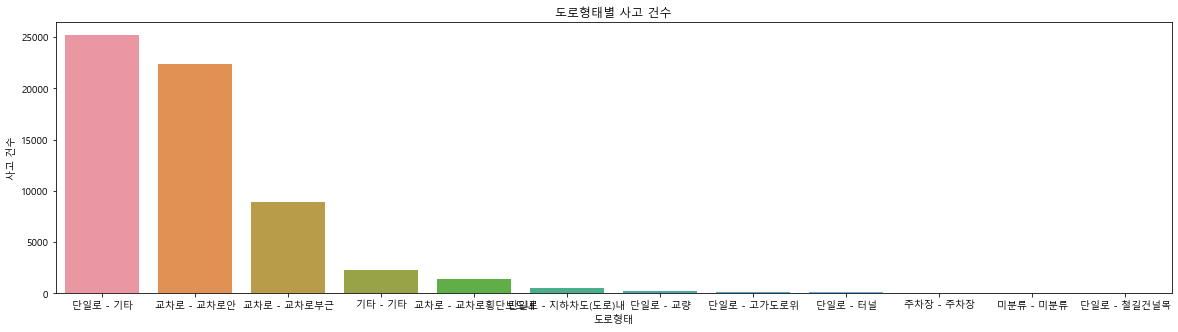

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x='도로형태', data=taas, order=taas['도로형태'].value_counts().index)
plt.xlabel("도로형태")
plt.ylabel("사고 건수")
plt.title("도로형태별 사고 건수")
plt.show()

### 가해운전자 차종
+ 가해운전자 차종이 이륜차인 data : 28601건

In [30]:
x1 = taas[taas['가해운전자 차종']=='이륜']
x1.shape

(28601, 25)

### 피해운전자 차종
+ 피해운전자 차종이 이륜차인 data : 36500건

In [31]:
x2 = taas[taas['피해운전자 차종']=='이륜']
x2.shape

(36500, 25)

### 가해운전자 = 피해운전자 = 이륜차 인 경우
+ 이륜차끼리 사고가 발생한 경우 : 3686건

In [32]:
x3 = taas[(taas['피해운전자 차종']=='이륜') & (taas['가해운전자 차종']=='이륜')]
x3.shape

(3686, 25)

### 가해운전자 성별

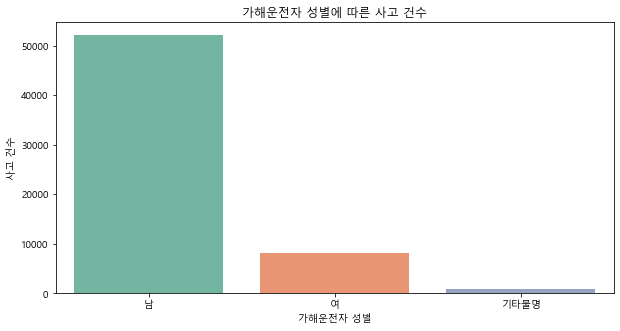

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='가해운전자 성별', data=taas, order=taas['가해운전자 성별'].value_counts().index)
plt.xlabel("가해운전자 성별")
plt.ylabel("사고 건수")
plt.title("가해운전자 성별에 따른 사고 건수")
plt.show()

### 가해운전자 연령
+ 10년 단위로 끊어서 분류하였음
+ 20대가 많은 것으로 보아 배달의 영향이 있을 것 같다는 가설을 세울 수 있었음

In [34]:
age_order_1 = ['10대','20대','30대','40대','50대','60대','70대','80대','90대','미분류']

#### 가해운전자가 이륜차인 경우의 가해운전자 연령대 분포

In [35]:
x1['가해_연령대'] = x1['가해운전자 연령'].astype(str).str[0]+'0대'
x1['가해_연령대'] = x1['가해_연령대'].replace('미0대', '미분류')

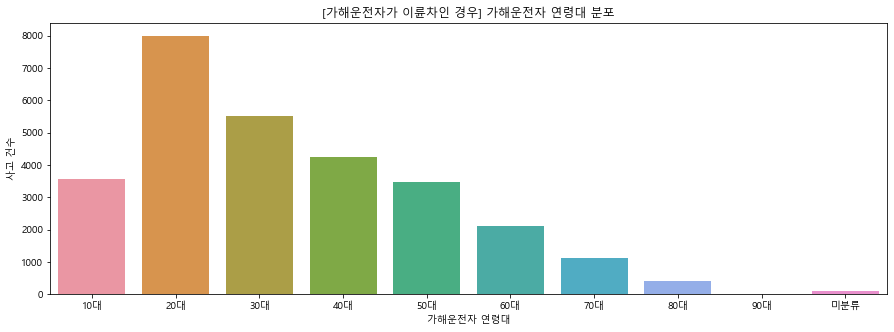

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x='가해_연령대', data=x1, order=age_order_1)
plt.xlabel("가해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[가해운전자가 이륜차인 경우] 가해운전자 연령대 분포")
plt.show()

#### 피해 운전자가 이륜차인 경우의 가해 운전자 연령대 분포

In [37]:
x2['가해_연령대'] = x2['가해운전자 연령'].astype(str).str[0]+'0대'
x2['가해_연령대'] = x2['가해_연령대'].replace('미0대', '미분류')

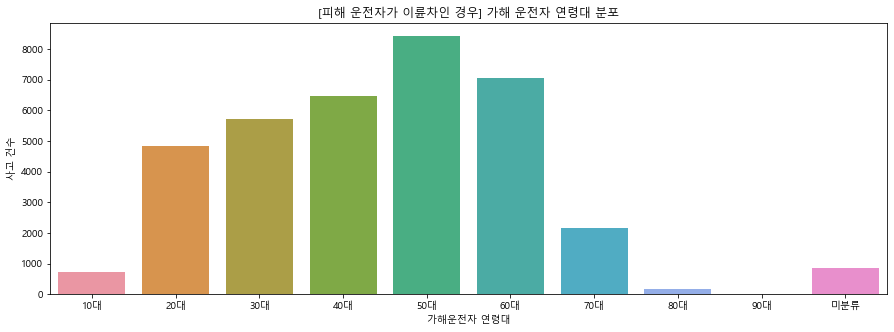

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='가해_연령대', data=x2, order=age_order_1)
plt.xlabel("가해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[피해 운전자가 이륜차인 경우] 가해 운전자 연령대 분포")
plt.show()

#### 가해운전자와 피해운전자가 모두 이륜차인 경우의 가해운전자 연령대 분포

In [39]:
x3['가해_연령대'] = x3['가해운전자 연령'].astype(str).str[0]+'0대'
x3['가해_연령대'] = x3['가해_연령대'].replace('미0대', '미분류')

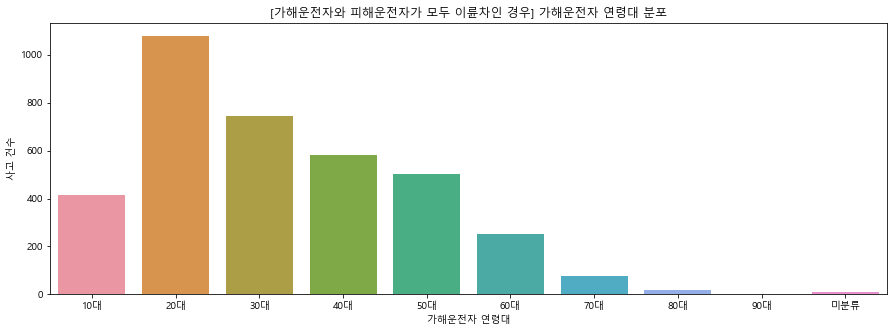

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x='가해_연령대', data=x3, order=age_order_1)
plt.xlabel("가해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[가해운전자와 피해운전자가 모두 이륜차인 경우] 가해운전자 연령대 분포")
plt.show()

#### 가해운전자 또는 피해운전자가 이륜차인 경우의 가해운전자 연령대 분포

In [41]:
taas['가해_연령대'] = taas['가해운전자 연령'].astype(str).str[0]+'0대'
taas['가해_연령대'] = taas['가해_연령대'].replace('미0대', '미분류')

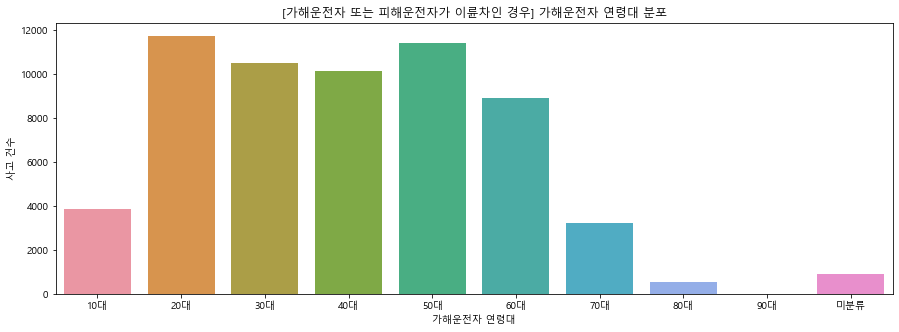

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(x='가해_연령대', data=taas, order=age_order_1)
plt.xlabel("가해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[가해운전자 또는 피해운전자가 이륜차인 경우] 가해운전자 연령대 분포")
plt.show()

### 피해운전자 연령
+ 10년 단위로 끊어서 분류하였음
+ 20대, 30대, 40대 순서로 사고가 많이 발생
+ 20대가 많은 것으로 보아 배달의 영향이 있을 것 같다는 가설을 세울 수 있었음

In [43]:
age_order_2 = ['10대','20대','30대','40대','50대','60대','70대','80대','90대','미분류','결측값']

#### 가해운전자가 이륜차인 경우의 피해운전자 연령대 분포

In [44]:
x1['피해_연령대'] = x1['피해운전자 연령'].astype(str).str[0]+'0대'
x1['피해_연령대'] = x1['피해_연령대'].replace('미0대', '미분류')

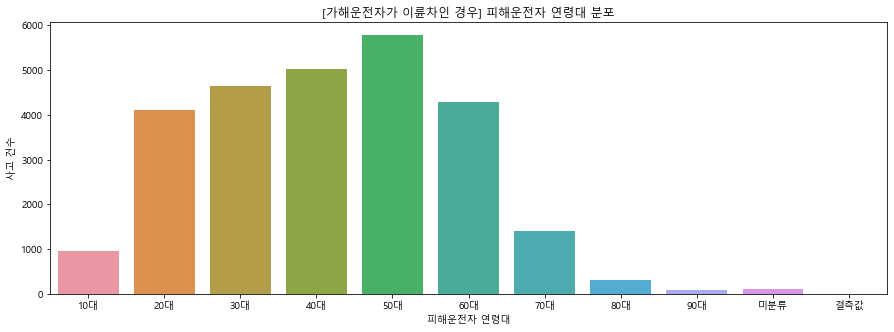

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x='피해_연령대', data=x1, order=age_order_2)
plt.xlabel("피해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[가해운전자가 이륜차인 경우] 피해운전자 연령대 분포")
plt.show()

#### 피해 운전자가 이륜차인 경우의 피해 운전자 연령대 분포

In [46]:
x2['피해_연령대'] = x2['피해운전자 연령'].astype(str).str[0]+'0대'
x2['피해_연령대'] = x2['피해_연령대'].replace('미0대', '미분류')

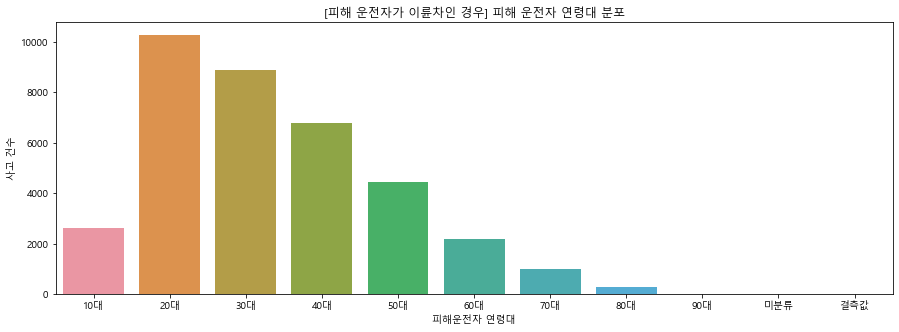

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(x='피해_연령대', data=x2, order=age_order_2)
plt.xlabel("피해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[피해 운전자가 이륜차인 경우] 피해 운전자 연령대 분포")
plt.show()

#### 가해운전자와 피해운전자가 모두 이륜차인 경우의 피해운전자 연령대 분포

In [48]:
x3['피해_연령대'] = x3['피해운전자 연령'].astype(str).str[0]+'0대'
x3['피해_연령대'] = x3['피해_연령대'].replace('미0대', '미분류')

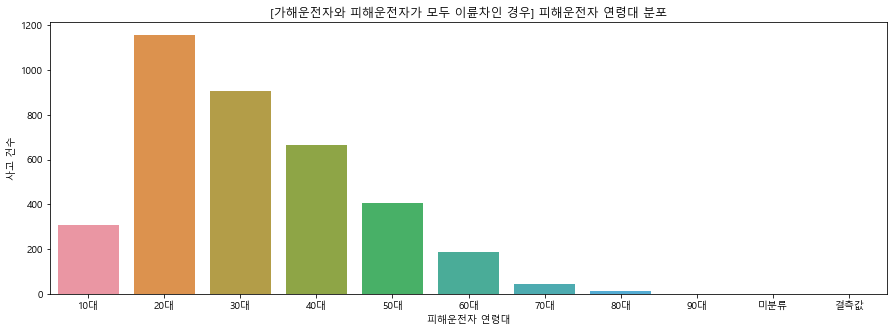

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x='피해_연령대', data=x3, order=age_order_2)
plt.xlabel("피해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[가해운전자와 피해운전자가 모두 이륜차인 경우] 피해운전자 연령대 분포")
plt.show()

#### 가해운전자 또는 피해운전자가 이륜차인 경우의 피해운전자 연령대 분포

In [50]:
taas['피해_연령대'] = taas['피해운전자 연령'].astype(str).str[0]+'0대'
taas['피해_연령대'] = taas['피해_연령대'].replace('미0대', '미분류')
taas['피해_연령대'] = taas['피해_연령대'].replace('n0대', '결측값')

In [51]:
age_list_2 = taas['피해_연령대'].unique().tolist()
age_list_2 

['70대', '30대', '60대', '40대', '20대', '50대', '10대', '80대', '결측값', '미분류', '90대']

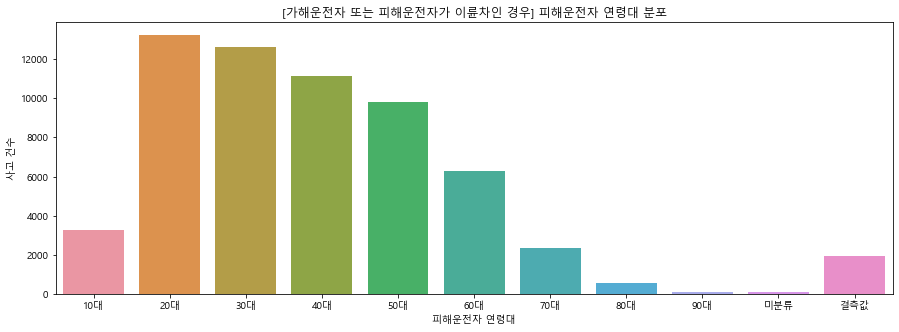

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x='피해_연령대', data=taas, order=age_order_2)
plt.xlabel("피해운전자 연령대")
plt.ylabel("사고 건수")
plt.title("[가해운전자 또는 피해운전자가 이륜차인 경우] 피해운전자 연령대 분포")
plt.show()

### 피해운전자 차종 비교
+ null 값의 경우 피해자 없이 혼자 사고난 것으로 추정

In [53]:
taas[taas['피해운전자 차종'].isnull()]

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,x,y,time,가해_연령대,피해_연령대
103,2019010700100030,2019년 1월 7일 01시,월요일,서울특별시 종로구 명륜4가,부상신고사고,0,0,0,1,차량단독 - 공작물충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,19세,부상신고,NaN,NaN,NaN,NaN,127.001739,37.582448,01시,10대,결측값
116,2019010700100515,2019년 1월 7일 22시,월요일,서울특별시 구로구 구로동,경상사고,0,0,1,0,차량단독 - 공작물충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,18세,경상,NaN,NaN,NaN,NaN,126.874799,37.499749,22시,10대,결측값
155,2019011000100143,2019년 1월 10일 10시,목요일,서울특별시 영등포구 도림동,중상사고,0,1,0,0,차량단독 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 교량,이륜,남,45세,중상,NaN,NaN,NaN,NaN,126.898306,37.511264,10시,40대,결측값
295,2019011800100172,2019년 1월 18일 10시,금요일,서울특별시 도봉구 창동,사망사고,1,0,2,0,차량단독 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,21세,사망,NaN,NaN,NaN,NaN,127.034884,37.637961,10시,20대,결측값
326,2019012000100063,2019년 1월 20일 02시,일요일,서울특별시 중랑구 중화동,경상사고,0,0,1,0,차량단독 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,이륜,남,17세,경상,NaN,NaN,NaN,NaN,127.079643,37.601715,02시,10대,결측값
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,2021102600100016,2021년 10월 26일 01시,화요일,울산광역시 동구 방어동,경상사고,0,0,1,0,차량단독 - 전도전복 - 전복,안전운전불이행,포장 - 건조,맑음,기타 - 기타,이륜,남,17세,경상,NaN,NaN,NaN,NaN,129.424110,35.483499,01시,10대,결측값
61289,2021111200100416,2021년 11월 12일 16시,금요일,울산광역시 중구 성남동,중상사고,0,1,0,0,차량단독 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,22세,상해없음,NaN,NaN,NaN,NaN,129.318451,35.553274,16시,20대,결측값
61293,2021111500100645,2021년 11월 15일 23시,월요일,울산광역시 남구 삼산동,경상사고,0,0,1,0,차량단독 - 공작물충돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,28세,경상,NaN,NaN,NaN,NaN,129.339237,35.539382,23시,20대,결측값
61382,2021122000100421,2021년 12월 20일 17시,월요일,울산광역시 동구 서부동,경상사고,0,0,1,0,차량단독 - 공작물충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,31세,경상,NaN,NaN,NaN,NaN,129.432888,35.522330,17시,30대,결측값
